# Introdução a Mercado Financeiro - Trading Com Dados

## Qualy
### API de dados financeiros Obtenha milhões de conjuntos de dados financeiros e econômicos de centenas de editores por meio de uma única API gratuita.

* Publico-alvo: ** Os profissionais análise de dados(data science e mining data) e investidores;**

Este é o site *[Quandl Data](https://www.quandl.com)*.

### Instalando dependentes
- pip3 install quandl;
- pip3 install plotly;
- pip3 install cufflinks;
- pip3 install pandas_datareader

In [3]:
# métodos específicos
import pandas as pd # Performance em análise de dados 
import numpy as np # manipulação dados e elementos númericos

#gráficos
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go 

# Informações mercado financeiro
import quandl as ql # dados macroeconômico
from pandas_datareader.data import DataReader # dados de indicadores ações e bolsas

import sys

# Salvar os gráficos no notebook
%matplotlib inline

In [4]:
with open('/security/token.txt','r') as api:
    api_quandl = api.read()

ql.ApiConfig.api_key = api_quandl

In [5]:
print('Seu token: '+ql.ApiConfig.api_key)

Seu token: sC3SLBLnr2xtm9C7UyYT


### Caso de exemplo BC - Brazil

In [6]:
# capturando o histórico da selic a partir de janeiro de 2009
df_selic = ql.get('BCB/432',trim_start='2009-01-01')

In [7]:
df_selic

,Value
Date,
2009-01-01,13.75
2009-01-02,13.75
2009-01-03,13.75
2009-01-04,13.75
2009-01-05,13.75
...,...
2020-08-05,2.25
2020-08-06,2.00
2020-08-07,2.00


In [8]:
#Informações sobre o dataset
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4239 entries, 2009-01-01 to 2020-08-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4239 non-null   float64
dtypes: float64(1)
memory usage: 66.2 KB


In [9]:
#quantidade de linhas e instâncias
df_selic.shape

(4239, 1)

In [10]:
#quantidade valores nulos
df_selic.isnull().sum()

Value    0
dtype: int64

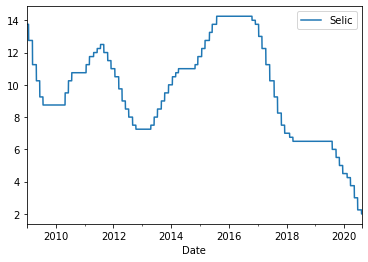

In [11]:
# gerando gráfico da taxa selic
df_selic = df_selic.rename(columns={'Value': 'Selic'})
df_selic.plot()

In [12]:
# capturando o indicador da ibovespa
df_ibov = ql.get('BCB/7845',start_date='2009-01-01')
df_ibov = df_ibov.rename(columns={'Value':'Bovespa'}) 
df_ibov

,Bovespa
Date,
2009-01-31,39300.0
2009-02-28,38183.0
2009-03-31,40926.0
2009-04-30,47289.0
2009-05-31,53197.0
...,...
2019-04-30,96353.0
2019-05-31,97030.0
2019-06-30,100967.0


In [13]:
# obter dados da inflação
df_ipca = ql.get('BCB/13522',start_date='2009-01-01')

In [14]:
df_ipca

,Value
Date,
2009-01-31,5.84
2009-02-28,5.90
2009-03-31,5.61
2009-04-30,5.53
2009-05-31,5.20
...,...
2020-03-31,3.30
2020-04-30,2.40
2020-05-31,1.88


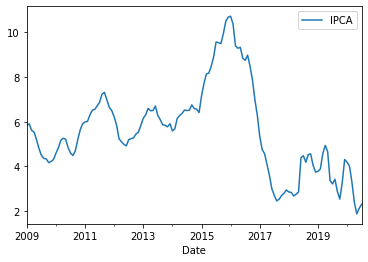

In [15]:
df_ipca = df_ipca.rename(columns={'Value':'IPCA'})
df_ipca.plot()

<function matplotlib.pyplot.show(*args, **kw)>

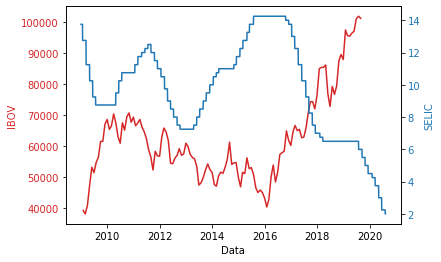

In [16]:
#Comparação entre os plots
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IBOV',color=color)
ax1.plot(df_ibov, color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx() # Replica as configurações do subplot criado anteriormente

color = 'tab:blue'
ax2.set_ylabel('SELIC',color=color)
ax2.plot(df_selic, color=color)
ax2.tick_params(axis='y',labelcolor=color)

plt.show

### Exemplo contratos futuros de em petróleo TEXAS

In [17]:
wti_crude = ql.get('EIA/PET_RWTC_D',start_date='2009-01-01')

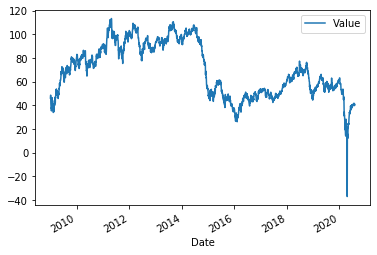

In [18]:
wti_crude.plot()

### Como juntas bases de criá-las separadamente?

Função merge serve para operações de join entre bases

In [19]:
from functools import reduce

In [20]:
dt_frames = [df_selic,df_ibov,df_ipca,wti_crude]
df_union = reduce(lambda left,right: pd.merge(left,right,on=['Date'],how='inner'), dt_frames)
df_union.columns = ['selic','ibovespa','ipca','petroleo']

In [21]:
df_union

,selic,ibovespa,ipca,petroleo
Date,,,,
2009-03-31,11.25,40926.0,5.61,49.64
2009-04-30,10.25,47289.0,5.53,50.35
2009-06-30,9.25,51466.0,4.80,69.82
2009-07-31,8.75,54766.0,4.50,69.26
2009-08-31,8.75,56489.0,4.36,69.97
...,...,...,...,...
2019-01-31,6.50,97393.0,3.78,53.84
2019-02-28,6.50,95584.0,3.89,57.21
2019-04-30,6.50,96353.0,4.94,63.83


In [23]:
df_union.corr()

,selic,ibovespa,ipca,petroleo
selic,1.000000,-0.624324,0.785230,-0.292771
ibovespa,-0.624324,1.000000,-0.648421,-0.108098
ipca,0.785230,-0.648421,1.000000,-0.140264
petroleo,-0.292771,-0.108098,-0.140264,1.000000


### Visualizando scatterplots ou gráficos de dispersão

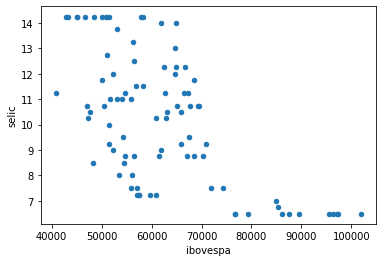

In [24]:
df_union.plot(kind='scatter',x='ibovespa',y='selic')

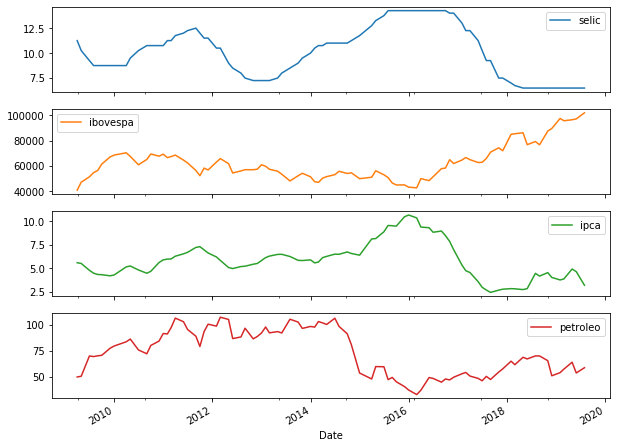

In [26]:
#Plots sem ter interseção
df_union.plot(subplots=True,figsize=(10,8))
plt.show()

### Ações e Indíces por yahoo

In [27]:
# capturar dados yahoo
df_ibov_yahoo = DataReader('^BVSP',data_source='yahoo',start='2009-01-01')

In [28]:
df_ibov_yahoo

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0
...,...,...,...,...,...,...
2020-08-03,103863.0,102304.0,102913.0,102830.0,10901000.0,102830.0
2020-08-04,103012.0,100005.0,102826.0,101216.0,12029800.0,101216.0
2020-08-05,103763.0,101220.0,101220.0,102802.0,10922100.0,102802.0


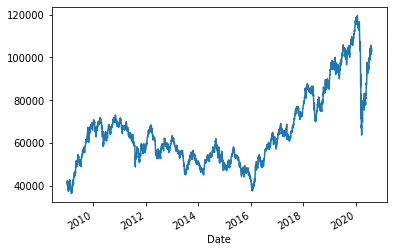

In [30]:
# Adj Close - Evento manipulação de liquidez(dividendos,bonus,splits...)
df_ibov_yahoo['Adj Close'].plot()

In [31]:
df_sp500_yahoo = DataReader('^GSPC',data_source='yahoo',start='2009-01-01')

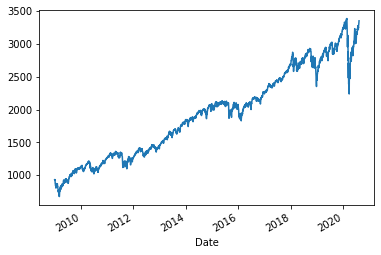

In [33]:
df_sp500_yahoo['Adj Close'].plot()

In [49]:
#Ações selecionado
stocks = ['GOLL4.SA','WEGE3.SA',
         'MGLU3.SA','VVAR3.SA',
         'LREN3.SA','BEEF3.SA',
         '^BVSP','^GSPC']

df = pd.DataFrame()

for stock in stocks:
    df[stock] = DataReader(stock,data_source='yahoo',start='2012-1-1')['Adj Close']

In [50]:
#valores nulos
df.isnull().sum()

GOLL4.SA     0
WEGE3.SA     0
MGLU3.SA     0
VVAR3.SA     0
LREN3.SA     0
BEEF3.SA     0
^BVSP        9
^GSPC       56
dtype: int64

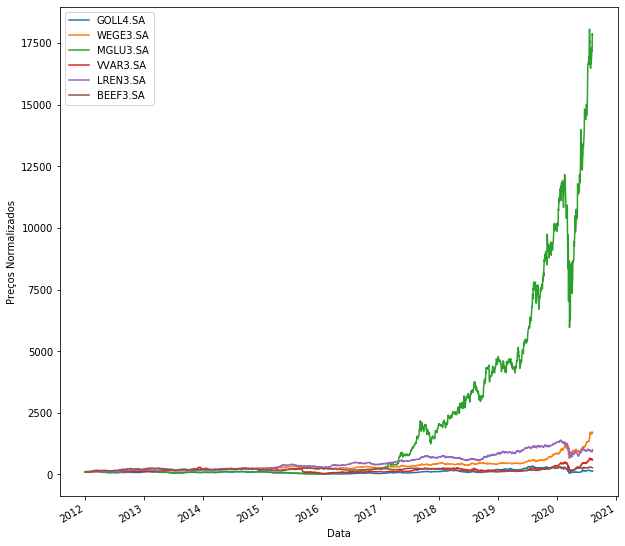

In [48]:
### Normalizar os preços e visualizá-los
(df/df.iloc[0]*100).plot(figsize=(10,10))

plt.ylabel('Preços Normalizados')

plt.xlabel('Data')

plt.show()

In [52]:
df_final = pd.merge(df_union,df,on='Date')

In [53]:
df_final.head()

,selic,ibovespa,ipca,petroleo,GOLL4.SA,WEGE3.SA,MGLU3.SA,VVAR3.SA,LREN3.SA,BEEF3.SA,^BVSP,^GSPC
Date,,,,,,,,,,,,
2012-01-31,10.5,63072.0,6.22,98.46,12.02,4.234565,0.517713,3.707742,4.979707,4.955412,63072.0,1312.410034
2012-02-29,10.5,65811.0,5.85,107.08,14.99,4.151965,0.612265,5.114128,5.518181,6.017965,65812.0,1365.680054
2012-04-30,9.0,61820.0,5.10,104.89,10.15,4.427593,0.587981,4.261773,6.039490,8.262168,61820.0,1397.910034
2012-05-31,8.5,54490.0,4.99,86.52,8.04,4.572691,0.487150,4.048684,5.731932,7.401521,54490.0,1310.329956
2012-07-31,8.0,56097.0,5.20,88.08,9.55,4.116603,0.535186,3.878213,6.039490,8.807234,56097.0,1379.319946


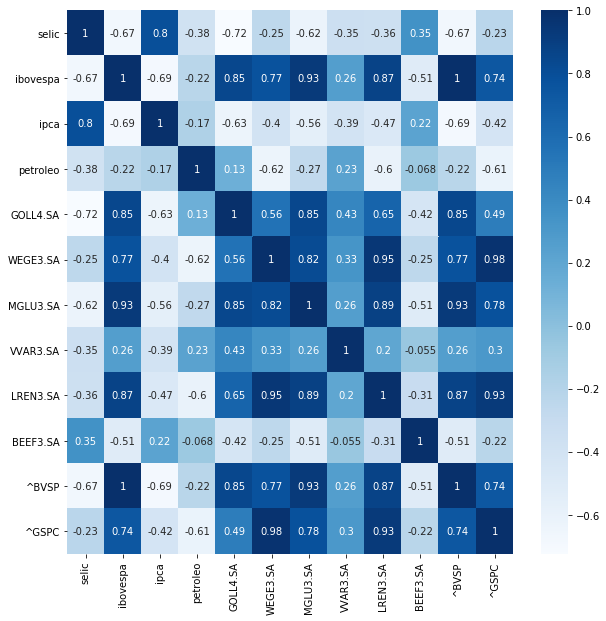

In [56]:
#Análise Gráfico matriz correlação
plt.figure(figsize= (10,10))
sns.heatmap(df_final.corr(),annot=True,cmap="Blues")

### Gráfico Candle

** É simplesmente informar no histórico movimentações se houve alta ou queda
em relação a comparação da abertura e a queda da ação;**

In [57]:
df_ibov_yahoo['candle'] = np.where(df_ibov_yahoo['Open'] > df_ibov_yahoo['Close'],'baixa','alta')
df_ibov_yahoo

,High,Low,Open,Close,Volume,Adj Close,candle
Date,,,,,,,
2009-01-02,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0,alta
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0,alta
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0,alta
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0,baixa
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0,alta
...,...,...,...,...,...,...,...
2020-08-03,103863.0,102304.0,102913.0,102830.0,10901000.0,102830.0,baixa
2020-08-04,103012.0,100005.0,102826.0,101216.0,12029800.0,101216.0,baixa
2020-08-05,103763.0,101220.0,101220.0,102802.0,10922100.0,102802.0,alta


In [58]:
#Dados Interativo
go.Figure(data = go.Candlestick(x=df_ibov_yahoo.index,open=df_ibov_yahoo['Open'],high=df_ibov_yahoo['High'],low=df_ibov_yahoo['Low'],close=df_ibov_yahoo['Close']))

### Gráficos de boxplots

In [59]:
df_sp500_yahoo.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

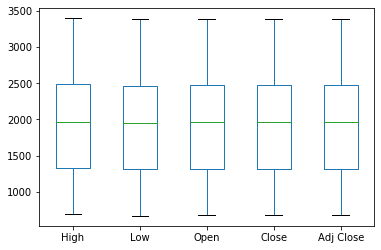

In [60]:
df_sp500_yahoo.drop('Volume', axis=1).plot(kind='box')